In [1]:
from pathlib import Path
from PIL import Image
import os, shutil
from os import listdir
## Image Resizing
from PIL import Image
import numpy as np

# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
import matplotlib.pyplot as plt
from dnn_app_utils_v3 import *

Get the train data

In [2]:
train_x_orig, train_y = get_train_data()

Get the test data

In [3]:
test_x_orig, test_y = get_test_data()

Get the dev data

In [4]:
dev_x_orig, dev_y = get_dev_data()

Plot a random image from the training data set 

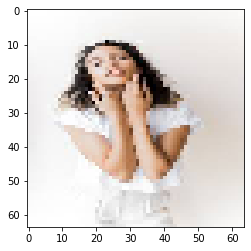

In [5]:
plt.imshow(train_x_orig[800])

Explore our dataset based on the shapes

In [6]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
print(train_x_orig[5].shape)
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

(64, 64, 3)
Number of training examples: 1219
Number of testing examples: 267
Each image is of size: (64, 64, 3)
train_x_orig shape: (1219, 64, 64, 3)
train_y shape: (1, 1219)
test_x_orig shape: (267, 64, 64, 3)
test_y shape: (1, 267)


Reshape the training, test and dev test exampes 
In this way, we change the form of our data set without losing information

In [7]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T 
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T
dev_x_flatten = dev_x_orig.reshape(dev_x_orig.shape[0], -1).T

train_x = train_x_flatten/255.
test_x = test_x_flatten/255.
dev_x = dev_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))
print ("dev_x's shape: " + str(dev_x.shape))

train_x's shape: (12288, 1219)
test_x's shape: (12288, 267)
dev_x's shape: (12288, 20)


# First model with 2 layers

In [8]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [9]:
# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, activation= "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation= "sigmoid")
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2, Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation = "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation = "relu")
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6942817657137829
Cost after iteration 100: 0.6020379283641577
Cost after iteration 200: 0.5970238576356243
Cost after iteration 300: 0.5912125044925365
Cost after iteration 400: 0.5854209847273797
Cost after iteration 500: 0.5800898217937484
Cost after iteration 600: 0.5743181373863203
Cost after iteration 700: 0.5680414142465429
Cost after iteration 800: 0.5611747116767568
Cost after iteration 900: 0.5534366104455352
Cost after iteration 1000: 0.544646574192716
Cost after iteration 1100: 0.5353187763503472
Cost after iteration 1200: 0.5299179256691945
Cost after iteration 1300: 0.5343716738655679
Cost after iteration 1400: 0.5314823030987307
Cost after iteration 1500: 0.528099378806382
Cost after iteration 1600: 0.5237944315509854
Cost after iteration 1700: 0.5203001864718696
Cost after iteration 1800: 0.5175509976485427
Cost after iteration 1900: 0.5147801397499864
Cost after iteration 2000: 0.5105512500974136
Cost after iteration 2100: 0.5054104768690354
Co

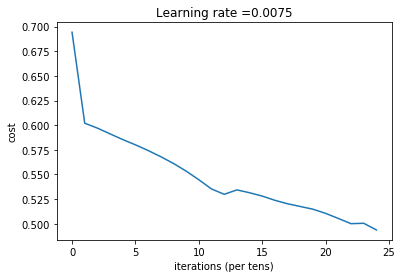

In [10]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [11]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.8301886792452831


In [12]:
predictions_dev = predict(dev_x, dev_y, parameters)

Accuracy: 0.5


In [13]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.6404494382022472


# Second model with 4 layer

In [14]:
### CONSTANTS ###
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [15]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.620289
Cost after iteration 100: 0.579312
Cost after iteration 200: 0.563606
Cost after iteration 300: 0.557126
Cost after iteration 400: 0.541766
Cost after iteration 500: 0.532322
Cost after iteration 600: 0.522355
Cost after iteration 700: 0.528650
Cost after iteration 800: 0.502115
Cost after iteration 900: 0.506676
Cost after iteration 1000: 0.493842
Cost after iteration 1100: 0.480463
Cost after iteration 1200: 0.492648
Cost after iteration 1300: 0.478944
Cost after iteration 1400: 0.502931
Cost after iteration 1500: 0.468114
Cost after iteration 1600: 0.463236
Cost after iteration 1700: 0.415034
Cost after iteration 1800: 0.432848
Cost after iteration 1900: 0.391059
Cost after iteration 2000: 0.389707
Cost after iteration 2100: 0.400504
Cost after iteration 2200: 0.363273
Cost after iteration 2300: 0.360057
Cost after iteration 2400: 0.362843


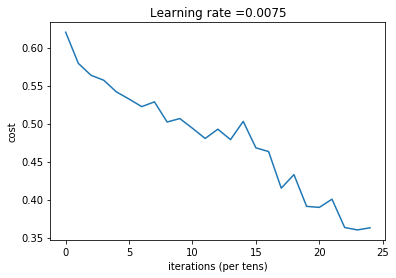

In [16]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [17]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9105824446267432


In [18]:
pred_dev = predict(dev_x, dev_y, parameters)

Accuracy: 0.6500000000000001


In [19]:
red_test = predict(test_x, test_y, parameters)

Accuracy: 0.602996254681648


# Our model

In [20]:
# GRADED FUNCTION: 
def us_layer_model(X, Y, layers_dims, learning_rate, num_iterations, print_cost=False):
    np.random.seed(1)
    costs = []                         # keep track of cost
    
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

## First attempt 
- 5 layers
- 0.005 learning rate
- 5000 iterations

In [21]:
### CONSTANTS ###
layers_dims = [12288, 20, 14, 7, 5, 1] #  5-layer model

Cost after iteration 0: 0.715376
Cost after iteration 100: 0.674728
Cost after iteration 200: 0.660302
Cost after iteration 300: 0.649023
Cost after iteration 400: 0.640193
Cost after iteration 500: 0.633249
Cost after iteration 600: 0.627781
Cost after iteration 700: 0.623466
Cost after iteration 800: 0.620029
Cost after iteration 900: 0.617287
Cost after iteration 1000: 0.615075
Cost after iteration 1100: 0.613141
Cost after iteration 1200: 0.610941
Cost after iteration 1300: 0.609031
Cost after iteration 1400: 0.607278
Cost after iteration 1500: 0.605632
Cost after iteration 1600: 0.603800
Cost after iteration 1700: 0.601753
Cost after iteration 1800: 0.599652
Cost after iteration 1900: 0.596963
Cost after iteration 2000: 0.593923
Cost after iteration 2100: 0.589669
Cost after iteration 2200: 0.584629
Cost after iteration 2300: 0.579495
Cost after iteration 2400: 0.573743
Cost after iteration 2500: 0.567516
Cost after iteration 2600: 0.560990
Cost after iteration 2700: 0.554610
Cost

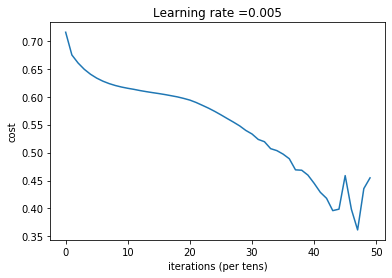

In [22]:
parameters = us_layer_model(train_x, train_y, layers_dims, learning_rate = 0.005, num_iterations = 5000, print_cost = True)

### Results of the prediction

In [23]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9122231337161608


In [24]:
pred_dev = predict(dev_x, dev_y, parameters)

Accuracy: 0.7500000000000002


In [25]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.6629213483146068


## Second attempt 
- 5 layers
- 0.0005 learning rate
- 3000 iterations

In [26]:
### CONSTANTS ###
layers_dims = [12288, 20, 14, 7, 5, 1] #  5-layer model

Cost after iteration 0: 0.715376
Cost after iteration 100: 0.691373
Cost after iteration 200: 0.689209
Cost after iteration 300: 0.687213
Cost after iteration 400: 0.685290
Cost after iteration 500: 0.683419
Cost after iteration 600: 0.681595
Cost after iteration 700: 0.679816
Cost after iteration 800: 0.678081
Cost after iteration 900: 0.676390
Cost after iteration 1000: 0.674742
Cost after iteration 1100: 0.673135
Cost after iteration 1200: 0.671568
Cost after iteration 1300: 0.670039
Cost after iteration 1400: 0.668547
Cost after iteration 1500: 0.667090
Cost after iteration 1600: 0.665669
Cost after iteration 1700: 0.664285
Cost after iteration 1800: 0.662934
Cost after iteration 1900: 0.661617
Cost after iteration 2000: 0.660332
Cost after iteration 2100: 0.659079
Cost after iteration 2200: 0.657856
Cost after iteration 2300: 0.656660
Cost after iteration 2400: 0.655494
Cost after iteration 2500: 0.654356
Cost after iteration 2600: 0.653246
Cost after iteration 2700: 0.652163
Cost

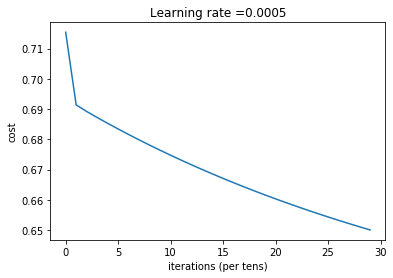

In [27]:
parameters = us_layer_model(train_x, train_y, layers_dims, learning_rate = 0.0005, num_iterations = 3000, print_cost = True)

### Results of prediction

In [28]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.7038556193601313


In [29]:
pred_dev = predict(dev_x, dev_y, parameters)

Accuracy: 0.5


In [30]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.7265917602996256


## Third attempt 
- 3 layers
- 0.0075 learning rate
- 2500 iterations

In [31]:
### CONSTANTS ###
layers_dims = [12288, 15, 7, 1] #  3-layer model

Cost after iteration 0: 1.025269
Cost after iteration 100: 0.589790
Cost after iteration 200: 0.580571
Cost after iteration 300: 0.572138
Cost after iteration 400: 0.563207
Cost after iteration 500: 0.553728
Cost after iteration 600: 0.543263
Cost after iteration 700: 0.530958
Cost after iteration 800: 0.523511
Cost after iteration 900: 0.527360
Cost after iteration 1000: 0.520222
Cost after iteration 1100: 0.513665
Cost after iteration 1200: 0.504690
Cost after iteration 1300: 0.500077
Cost after iteration 1400: 0.491965
Cost after iteration 1500: 0.483667
Cost after iteration 1600: 0.474076
Cost after iteration 1700: 0.468930
Cost after iteration 1800: 0.461493
Cost after iteration 1900: 0.452085
Cost after iteration 2000: 0.446912
Cost after iteration 2100: 0.436162
Cost after iteration 2200: 0.427115
Cost after iteration 2300: 0.419951
Cost after iteration 2400: 0.414146


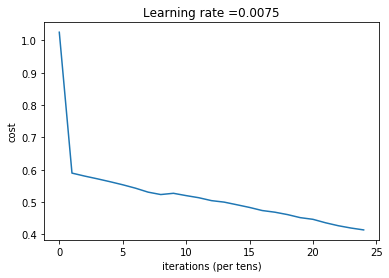

In [32]:
parameters = us_layer_model(train_x, train_y, layers_dims, learning_rate = 0.0075, num_iterations = 2500, print_cost = True)

### Results

In [33]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.8621821164889254


In [34]:
pred_dev = predict(dev_x, dev_y, parameters)

Accuracy: 0.7000000000000002


In [35]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.6179775280898876


## Fourth attempt 
- 3 layers
- 0.0005 learning rate
- 4000 iterations

In [36]:
## CONSTANTS ###
layers_dims = [12288, 15, 7, 1] #  3-layer model

Cost after iteration 0: 1.025269
Cost after iteration 100: 0.611394
Cost after iteration 200: 0.602981
Cost after iteration 300: 0.601302
Cost after iteration 400: 0.599943
Cost after iteration 500: 0.598693
Cost after iteration 600: 0.597515
Cost after iteration 700: 0.596329
Cost after iteration 800: 0.595196
Cost after iteration 900: 0.594154
Cost after iteration 1000: 0.593122
Cost after iteration 1100: 0.592077
Cost after iteration 1200: 0.591033
Cost after iteration 1300: 0.590069
Cost after iteration 1400: 0.589158
Cost after iteration 1500: 0.588258
Cost after iteration 1600: 0.587401
Cost after iteration 1700: 0.586567
Cost after iteration 1800: 0.585766
Cost after iteration 1900: 0.584994
Cost after iteration 2000: 0.584232
Cost after iteration 2100: 0.583484
Cost after iteration 2200: 0.582742
Cost after iteration 2300: 0.582008
Cost after iteration 2400: 0.581305
Cost after iteration 2500: 0.580617
Cost after iteration 2600: 0.579939
Cost after iteration 2700: 0.579265
Cost

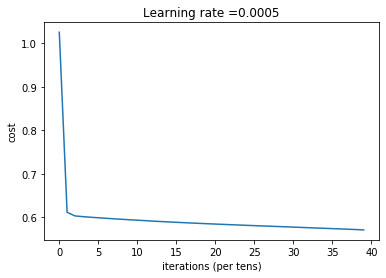

In [37]:
parameters = us_layer_model(train_x, train_y, layers_dims, learning_rate = 0.0005, num_iterations = 4000, print_cost = True)

### Results

In [38]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.7063166529942576


In [39]:
pred_dev = predict(dev_x, dev_y, parameters)

Accuracy: 0.5


In [40]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.7191011235955057


## Fifth attempt 
- 5 layers
- 0.0005 learning rate
- 5000 iterations

In [41]:
### CONSTANTS ###
layers_dims = [12288, 20, 14, 7, 5, 1] #  5-layer model

Cost after iteration 0: 0.715376
Cost after iteration 100: 0.691373
Cost after iteration 200: 0.689209
Cost after iteration 300: 0.687213
Cost after iteration 400: 0.685290
Cost after iteration 500: 0.683419
Cost after iteration 600: 0.681595
Cost after iteration 700: 0.679816
Cost after iteration 800: 0.678081
Cost after iteration 900: 0.676390
Cost after iteration 1000: 0.674742
Cost after iteration 1100: 0.673135
Cost after iteration 1200: 0.671568
Cost after iteration 1300: 0.670039
Cost after iteration 1400: 0.668547
Cost after iteration 1500: 0.667090
Cost after iteration 1600: 0.665669
Cost after iteration 1700: 0.664285
Cost after iteration 1800: 0.662934
Cost after iteration 1900: 0.661617
Cost after iteration 2000: 0.660332
Cost after iteration 2100: 0.659079
Cost after iteration 2200: 0.657856
Cost after iteration 2300: 0.656660
Cost after iteration 2400: 0.655494
Cost after iteration 2500: 0.654356
Cost after iteration 2600: 0.653246
Cost after iteration 2700: 0.652163
Cost

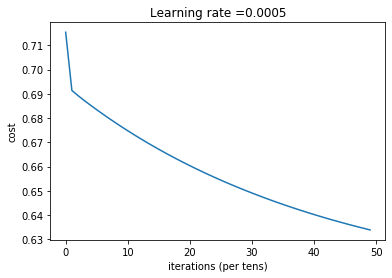

In [42]:
parameters = us_layer_model(train_x, train_y, layers_dims, learning_rate = 0.0005, num_iterations = 5000, print_cost = True)

### Results

In [43]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.7038556193601313


In [44]:
pred_dev = predict(dev_x, dev_y, parameters)

Accuracy: 0.5


In [45]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.7265917602996256


## Six attempt 
- 5 layers
- 0.05 learning rate
- 5000 iterations

In [46]:
### CONSTANTS ###
layers_dims = [12288, 20, 14, 7, 5, 1] #  5-layer model

Cost after iteration 0: 0.715376
Cost after iteration 100: 0.615803
Cost after iteration 200: 0.608486
Cost after iteration 300: 0.607672
Cost after iteration 400: 0.607575
Cost after iteration 500: 0.607564
Cost after iteration 600: 0.607562
Cost after iteration 700: 0.607562
Cost after iteration 800: 0.607562
Cost after iteration 900: 0.607562
Cost after iteration 1000: 0.607562
Cost after iteration 1100: 0.607562
Cost after iteration 1200: 0.607562
Cost after iteration 1300: 0.607562
Cost after iteration 1400: 0.607562
Cost after iteration 1500: 0.607562
Cost after iteration 1600: 0.607562
Cost after iteration 1700: 0.607562
Cost after iteration 1800: 0.607562
Cost after iteration 1900: 0.607562
Cost after iteration 2000: 0.607562
Cost after iteration 2100: 0.607562
Cost after iteration 2200: 0.607562
Cost after iteration 2300: 0.607562
Cost after iteration 2400: 0.607562
Cost after iteration 2500: 0.607562
Cost after iteration 2600: 0.607562
Cost after iteration 2700: 0.607562
Cost

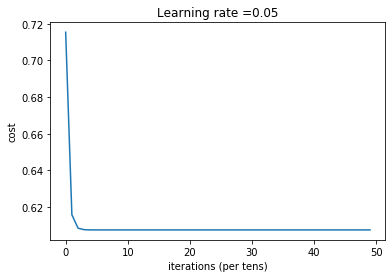

In [47]:
parameters = us_layer_model(train_x, train_y, layers_dims, learning_rate = 0.05, num_iterations = 5000, print_cost = True)

### Results

In [48]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.7038556193601313


In [49]:
pred_dev = predict(dev_x, dev_y, parameters)

Accuracy: 0.5


In [50]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.7265917602996256


## Seven attempt 
- 5 layers
- 0.005 learning rate
- 2000 iterations

In [51]:
### CONSTANTS ###
layers_dims = [12288, 20, 14, 7, 5, 1] #  5-layer model

Cost after iteration 0: 0.715376
Cost after iteration 100: 0.674728
Cost after iteration 200: 0.660302
Cost after iteration 300: 0.649023
Cost after iteration 400: 0.640193
Cost after iteration 500: 0.633249
Cost after iteration 600: 0.627781
Cost after iteration 700: 0.623466
Cost after iteration 800: 0.620029
Cost after iteration 900: 0.617287
Cost after iteration 1000: 0.615075
Cost after iteration 1100: 0.613141
Cost after iteration 1200: 0.610941
Cost after iteration 1300: 0.609031
Cost after iteration 1400: 0.607278
Cost after iteration 1500: 0.605632
Cost after iteration 1600: 0.603800
Cost after iteration 1700: 0.601753
Cost after iteration 1800: 0.599652
Cost after iteration 1900: 0.596963


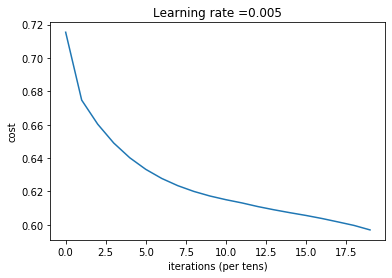

In [52]:
parameters = us_layer_model(train_x, train_y, layers_dims, learning_rate = 0.005, num_iterations = 2000, print_cost = True)

### Results

In [53]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.7038556193601313


In [54]:
pred_dev = predict(dev_x, dev_y, parameters)

Accuracy: 0.5


In [55]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.7265917602996256
